<a href="https://colab.research.google.com/github/Karishma-Kuria/CMPE-255-Dimensionality-Reduction-Techniques/blob/main/DimensionalityReduction_For_Tabular_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Various Dimensionality Reduction techniques**

In [45]:
# importing relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# The dataset which I have used is uploaded in the below git-repo
dataset_path = 'https://github.com/Karishma-Kuria/CMPE-255-Dimensionality-Reduction-Techniques/blob/main/Wine.csv?raw=true'
columns = ['class','alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
    'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
    'proanthocyanins', 'color_intensity', 'hue',
    'od280/od315_of_diluted_wines', 'proline']
wine_dataset = pd.read_csv(dataset_path, names=columns, header=0)
wine_ds = wine_dataset.copy()

# Prints top 5 rows of dataset
wine_ds.head()


,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [46]:
wine_ds.describe

<bound method NDFrame.describe of      class  alcohol  malic_acid  ...   hue  od280/od315_of_diluted_wines  proline
0        1    13.20        1.78  ...  1.05                          3.40     1050
1        1    13.16        2.36  ...  1.03                          3.17     1185
2        1    14.37        1.95  ...  0.86                          3.45     1480
3        1    13.24        2.59  ...  1.04                          2.93      735
4        1    14.20        1.76  ...  1.05                          2.85     1450
..     ...      ...         ...  ...   ...                           ...      ...
172      3    13.71        5.65  ...  0.64                          1.74      740
173      3    13.40        3.91  ...  0.70                          1.56      750
174      3    13.27        4.28  ...  0.59                          1.56      835
175      3    13.17        2.59  ...  0.60                          1.62      840
176      3    14.13        4.10  ...  0.61                      

In [47]:
wine_ds.shape

(177, 14)

# **1. Dimensionality Reduction using PCA**

PCA as an unsupervised linear dimensionality reduction technique that helps us identify patterns in data based of the correlation between the features. 

PCA aims to find the directions of the maximum variance in high dimensional data and project it onto a lower dimensional feature space.

## **Calculating Correlation**

In [48]:
wine_ds.corr()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
class,1.000000,-0.321238,0.436127,-0.048260,0.513963,-0.198944,-0.717933,-0.846485,0.487215,-0.494887,0.268562,-0.617690,-0.786428,-0.631227
alcohol,-0.321238,1.000000,0.099963,0.210964,-0.303350,0.258742,0.284543,0.230133,-0.151445,0.127561,0.547883,-0.075375,0.057417,0.641068
malic_acid,0.436127,0.099963,1.000000,0.164955,0.286148,-0.049049,-0.333512,-0.409324,0.291501,-0.217975,0.250053,-0.560854,-0.366720,-0.189512
ash,-0.048260,0.210964,0.164955,1.000000,0.446698,0.287107,0.128176,0.114084,0.187354,0.008082,0.258643,-0.075181,0.001503,0.222979
alcalinity_of_ash,0.513963,-0.303350,0.286148,0.446698,1.000000,-0.071707,-0.317583,-0.346922,0.359395,-0.190779,0.020478,-0.272719,-0.268186,-0.436858
magnesium,-0.198944,0.258742,-0.049049,0.287107,-0.071707,1.000000,0.208200,0.187101,-0.252091,0.226504,0.199337,0.052042,0.046961,0.387542
total_phenols,-0.717933,0.284543,-0.333512,0.128176,-0.317583,0.208200,1.000000,0.864046,-0.448301,0.610533,-0.056401,0.432987,0.699566,0.495839
flavanoids,-0.846485,0.230133,-0.409324,0.114084,-0.346922,0.187101,0.864046,1.000000,-0.536326,0.650254,-0.174411,0.543208,0.786372,0.491180
nonflavanoid_phenols,0.487215,-0.151445,0.291501,0.187354,0.359395,-0.252091,-0.448301,-0.536326,1.000000,-0.363268,0.140192,-0.261709,-0.501859,-0.308886
proanthocyanins,-0.494887,0.127561,-0.217975,0.008082,-0.190779,0.226504,0.610533,0.650254,-0.363268,1.000000,-0.027112,0.294397,0.513415,0.325731


### The above table shows the correlation between all the pairs. If the correlation is positive, it means if one variable increases the other variable also increases. Negative means if one variable decreases the other also decreases. 

In [49]:
X_variables = wine_ds.iloc[:,1:14]
X_variables

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [50]:

y_variable = wine_ds.iloc[:,13]
y_variable

0      1050
1      1185
2      1480
3       735
4      1450
       ... 
172     740
173     750
174     835
175     840
176     560
Name: proline, Length: 177, dtype: int64

In [51]:
wine_ds.shape

(177, 14)

## **Visualizing the Correlation**

Text(0.5, 1.0, 'Correlation between various fearures of the dataset')

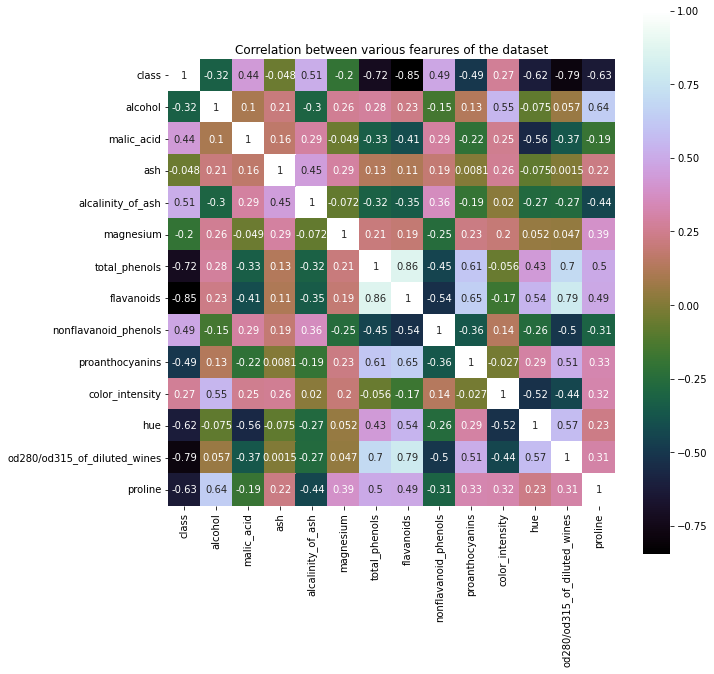

In [52]:
correlation = wine_ds.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between various fearures of the dataset')

## **Standarizing**
This process shifts the distribution of all the variables in the dataset to a mean of 0 and standard deviation of 1.

In [53]:
# Used the standard scaler method to convert the values into integers between -3 and +3
scaler = StandardScaler()
transformed_ds = scaler.fit_transform(X_variables)

## **Creating Covariance Matrix**

In [54]:
covariance_matrix = np.cov(transformed_ds.T)
print("The Covariance Matrix is \n", covariance_matrix)

The Covariance Matrix is 
 [[ 1.00568182  0.10053095  0.21216306 -0.30507344  0.26021246  0.28615975
   0.23144084 -0.15230593  0.12828549  0.5509959  -0.07580325  0.05774296
   0.64471003]
 [ 0.10053095  1.00568182  0.16589228  0.28777352 -0.04932772 -0.33540671
  -0.41164981  0.2931568  -0.21921348  0.25147381 -0.56404063 -0.36880324
  -0.19058844]
 [ 0.21216306  0.16589228  1.00568182  0.44923581  0.2887384   0.12890384
   0.11473173  0.18841851  0.00812754  0.26011245 -0.07560818  0.00151189
   0.22424625]
 [-0.30507344  0.28777352  0.44923581  1.00568182 -0.07211429 -0.31938703
  -0.34889322  0.36143713 -0.19186273  0.02059459 -0.27426812 -0.26970941
  -0.43933996]
 [ 0.26021246 -0.04932772  0.2887384  -0.07211429  1.00568182  0.20938338
   0.18816443 -0.25352343  0.2277909   0.20046953  0.05233807  0.04722811
   0.38974352]
 [ 0.28615975 -0.33540671  0.12890384 -0.31938703  0.20938338  1.00568182
   0.86895489 -0.45084767  0.61400166 -0.05672183  0.43544754  0.7035412
   0.498656

## **Plotting the Covariance between pairs.**

Text(0.5, 1.0, 'Correlation between different features')

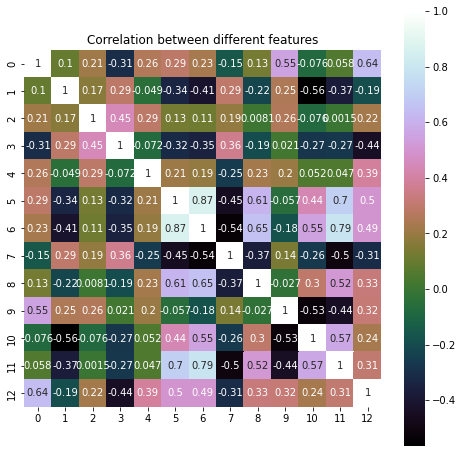

In [55]:
plt.figure(figsize=(8,8))
sns.heatmap(covariance_matrix, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')


## **Calculating the Eigen Values and Eigen Vectors.**

In [56]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print('Eigenvectors \n%s' %eigen_vectors)
print('\nEigenvalues \n%s' %eigen_values)

Eigenvectors 
[[-0.13788809 -0.48583464 -0.20877489  0.26989127 -0.0011407  -0.21141036
  -0.05751996  0.01378744 -0.40108372  0.24221102 -0.48825288  0.27224545
   0.21974133]
 [ 0.24638109 -0.22157478  0.09019328 -0.06287575  0.53313643 -0.53070694
   0.43373015  0.02646079 -0.06288444 -0.11060787  0.05064287 -0.11946877
  -0.30063337]
 [ 0.0043183  -0.31528188  0.62374304  0.16036596 -0.20534831 -0.15511547
  -0.14513486 -0.14187527  0.17143391  0.04222     0.31451537  0.48509813
  -0.11389638]
 [ 0.23737955  0.01214349  0.61379873 -0.06481078  0.0572236   0.09411101
  -0.29042173  0.09233892 -0.42777199  0.06666045 -0.20002174 -0.46359328
   0.12325409]
 [-0.1350017  -0.30028828  0.13573164 -0.7063438  -0.39169387 -0.0385105
   0.31843019  0.05515582  0.15196623 -0.07198266 -0.27039812 -0.04908458
   0.10540432]
 [-0.39586939 -0.07054905  0.14462048  0.13330889  0.20259928  0.08301569
  -0.02386071 -0.46358085  0.40699033  0.31844113 -0.32109678 -0.3241189
  -0.24699637]
 [-0.42439

## **Selecting Priciple component:**
### Now I have sorted the Eigen Values in descending order. The Eigen Vector with the least Eigen Value will hold the least information about the distribution and can dropped to reduce the dimensionality. 

In [57]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
print('Eigenvalues arranged in descending order:')
for i in eigen_pairs:
    print(i[0])

Eigenvalues arranged in descending order:
4.704377600172432
2.515578647525724
1.4615873625971223
0.8666329761397848
0.9296966527894513
0.6485116223474783
0.5551180722779729
0.10454034702476395
0.3527316598887795
0.16933350672186823
0.29082309174199816
0.22672110096297002
0.24821099617328518


## **Applying PCA**

In [58]:
pca = PCA()
pca = pca.fit(transformed_ds)
pca_explained_variance = pca.explained_variance_ratio_
pca_explained_variance

array([0.35983071, 0.1924128 , 0.1117946 , 0.07111109, 0.06628744,
       0.04960367, 0.04246014, 0.02697991, 0.02224462, 0.01898528,
       0.01734155, 0.01295206, 0.00799613])

## **Plotting variance and Principle Components**

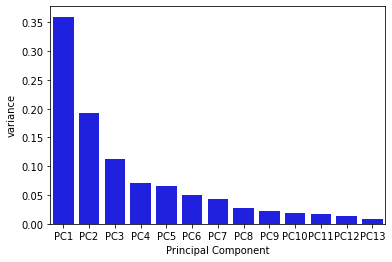

In [59]:
dataframe = pd.DataFrame({'variance':pca.explained_variance_ratio_,
             'Principal Component':['PC1','PC2','PC3','PC4', 'PC5','PC6','PC7',
                                    'PC8','PC9','PC10','PC11', 'PC12','PC13']})
sns.barplot(x='Principal Component',y="variance", 
           data=dataframe, color="b");

### The above bar graph shows that the first 2 variables holds the maximum information about the distribution as compared to the rest of the variables.

Text(0, 0.5, 'Cumulative explained variance')

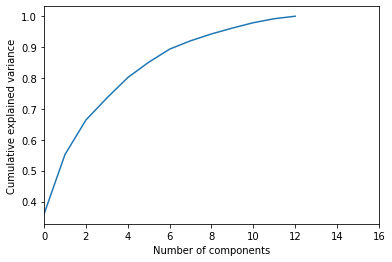

In [60]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,16,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

### From the above graph its clear that, 90% variance is covered till the 12th variable and hence we can drop the last features.

<Figure size 576x432 with 0 Axes>

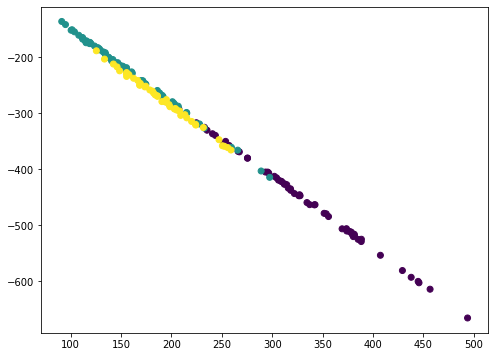

In [61]:
pca_2 = PCA(n_components = 2 )
pca_2 = pca_2.fit(transformed_ds)
pca_2d = pca_2.transform(X_variables)
plt.figure(figsize=(8,6))
wine_ds['class'] = wine_ds['class'].replace({0:0, 1:1})

# Plotting the graph between the 2 principle component against the class variable 
plt.figure(figsize=(8,6))
plt.scatter(pca_2d[:,0], pca_2d[:,1],c=wine_ds['class'])
plt.show()

In the above graph the data points are plotted in 2-dimensional space and the points are clustered based on the class variable.

In [62]:
# Creating a dataframe featuring the two Principal components that we acquired through PCA.
PCA_dataset1 = pd.DataFrame(data = pca_2d, columns = ['component1', 'component2'] )
PCA_dataset1.head()

,component1,component2
0,314.440340,-427.103904
1,351.561659,-478.283964
2,437.940024,-592.533107
3,224.783342,-316.499425
4,429.240887,-580.471093


In [63]:
# Extracting the two features from above in order to add them to the dataframe.
principal_component1 = PCA_dataset1['component1']
principal_component2 = PCA_dataset1['component2']

<Figure size 432x288 with 0 Axes>

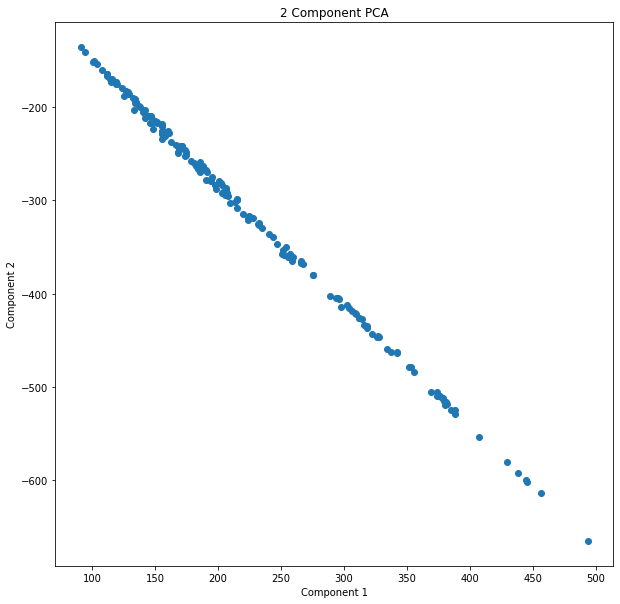

In [64]:
# Visualizing the effects of the Principal Component Analysis.
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
plt.scatter(PCA_dataset1['component1'], PCA_dataset1['component2'])

In [65]:
pca_2d.shape

(177, 2)

From the above shape its clear that the dimensions are reduced to 2-dimension for this dataset.

# **2.Dimensionality Reduction using SVD**

SVD is also a linear dimensionality reduction technique.
Very similar to PCA, but it doesn't center the data before computing the singular value decomposition. This means it can work with sparse matrices efficiently.

In [66]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Using the same dataset 
# Prints top 10 rows of dataset
wine_ds.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [67]:
wine_ds.shape

(177, 14)

### Here I have invoked LabelEncoder and applied it to all the columns in the dataset. This will convert all categorical columns into numerical columns using one-hot encoding technique.

In [68]:
encoder = LabelEncoder()
for col in wine_ds.columns:
    wine_ds[col] = encoder.fit_transform(wine_ds[col])

### Now I have checked the converted numerical columns in dataset

In [69]:
wine_ds.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,65,49,18,1,21,68,91,9,31,56,50,102,92
1,0,63,71,62,31,22,73,114,13,96,82,48,86,101
2,0,120,59,48,20,33,95,121,7,84,108,30,104,116
3,0,67,81,74,44,37,73,89,20,66,53,49,73,66
4,0,115,47,45,10,32,89,119,17,75,96,50,68,115


### Here I have divided the dataset into X-variable and Y-variable and then normalized both.

In [70]:
X_variables = wine_ds.iloc[:,1:10]
y_label = wine_ds.iloc[:, 0]

In [71]:
scaler = StandardScaler()
X_features = scaler.fit_transform(X_variables)

### Applied SVD, here u and v are singular vectors and s is singular value.

In [72]:
u, s, v = np.linalg.svd(X_features, full_matrices=True)

In [73]:
u.shape

(177, 177)

In [74]:
s.shape

(9,)

In [75]:
v.shape

(9, 9)

### Here I have analyzed and plotted the variance explained by each singular vector in a bar graph.

Text(0, 0.5, 'Percent of the variance explained')

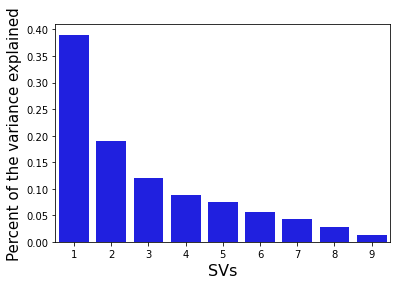

In [76]:
variance_explained = np.round(s**2/np.sum(s**2), decimals=3)
variance_explained
 
sns.barplot(x=list(range(1,len(variance_explained)+1)),
            y=variance_explained, color="blue")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent of the variance explained', fontsize=15)

This graph explains that first 2-3 singular vectors contribute more towards holding the most information about the dataset.

### Creating the new dataframe which contains the 2 singular vectors and the metadata.

In [77]:
col_labels= ['SV'+str(i) for i in range(1,3)]
svd_df = pd.DataFrame(u[:,0:2], index=wine_ds["class"].tolist(), columns=col_labels)
svd_df=svd_df.reset_index()
svd_df.rename(columns={'index':'Class'}, inplace=True)
svd_df.head()

,Class,SV1,SV2
0,0,-0.063013,-0.078817
1,0,-0.079689,0.061589
2,0,-0.135112,0.072540
3,0,-0.034945,0.140693
4,0,-0.119662,0.049405


### Plotted the variance explained by both the Singular vector components against the target feature.

Text(0, 0.5, 'SV 2: 19.0%')

<Figure size 432x288 with 0 Axes>

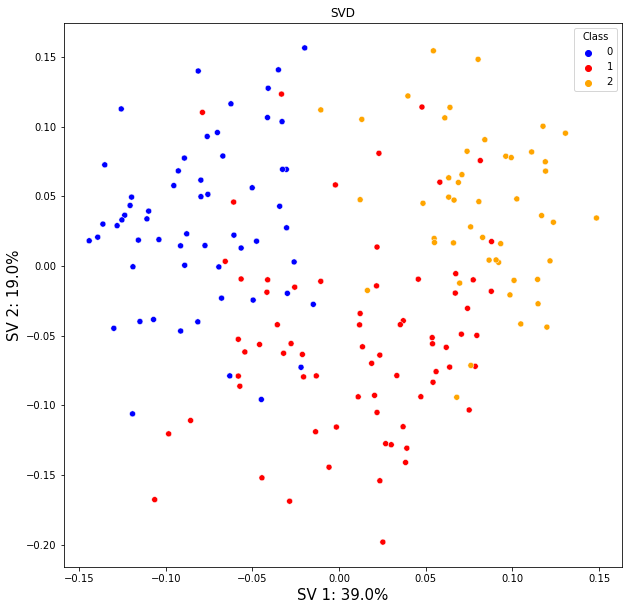

In [78]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('SV1')
plt.ylabel('SV2')
plt.title('SVD')
sns.scatterplot(x=svd_df['SV1'], y=svd_df['SV2'],hue=svd_df["Class"],
                palette=["blue","red","orange"])
plt.xlabel('SV 1: {0}%'.format(variance_explained[0]*100), fontsize=15)
plt.ylabel('SV 2: {0}%'.format(variance_explained[1]*100), fontsize=15)

The above plot shows the contribution of the explained variance for both the Singular vector components and is plotted against the class variable in 2-dimensional plane. In this the points with same class variables are marked with same colors.

# **3. Dimensionality Reduction Using LLE**

### LLE is an unsupervised and non-linear dimensionality reduction technique that creates an embedding of the dataset and tries to preserve the relationships between neighborhoods in the dataset.

LLE can be thought of as a series of local PCAs that are globally compared to find the best non-linear embedding.
When the data is intrinsically very high dimensional—it can't be described linearly with just a few components.

When this is the case, nonlinear manifold embeddings like LLE and Isomap can be helpful.
### I have used the same Wine dataset for LLE

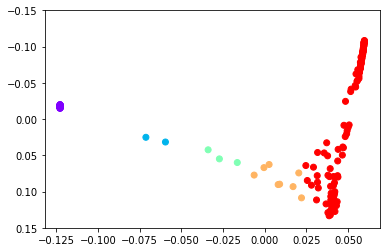

In [79]:
from sklearn.manifold import LocallyLinearEmbedding
# here I have set the number of components to be derived as 2 
lle= LocallyLinearEmbedding(n_neighbors=5, n_components=2)
X_transformed=lle.fit_transform(wine_ds)

# plotting the datapoints in 2-dimensional space
fig, ax = plt.subplots()
colorize = dict(c=X_transformed[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

# **4. Dimensionality reduction T-SNE Technique**

T-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear dimensional reduction algorithm used for exploring high-dimensional data. t-SNE maps maps multi-dimensional data to two or more dimensions that are suitable for human observation.
PCA and T-SNE are different since PCA is a linear dimension reduction technique that seeks to maximize variance and preserves large pairwise distances. In other words, things that are different end up far apart. This can lead to poor visualization especially when dealing with non-linear manifold structures. Manifold structure has any geometric shape like: cylinder, ball, curve, etc.

t-SNE differs from PCA by preserving only small pairwise distances or local similarities whereas PCA is concerned with preserving large pairwise distances to maximize variance.

In [40]:
# Implementing t-SNE.
from sklearn.manifold import TSNE
# here I have set the number of components to be derived as 2 
# I have used the same wine dataset for this technique and now applying T-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results1 = tsne.fit_transform(X_features)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 177 samples in 0.000s...
[t-SNE] Computed neighbors for 177 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 177 / 177
[t-SNE] Mean sigma: 1.594357
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.144791
[t-SNE] KL divergence after 300 iterations: 0.532424


In [41]:
tsne_results1

array([[  1.3584874 ,   5.0159817 ],
       [ -6.786719  ,   6.07029   ],
       [ -9.457825  ,   3.6280434 ],
       [ -9.925628  ,   8.189113  ],
       [ -8.933654  ,   3.2744112 ],
       [ -6.0799212 ,   3.5147226 ],
       [ -6.736045  ,   8.319336  ],
       [ -6.556342  ,   2.434108  ],
       [ -6.751655  ,   2.7008493 ],
       [ -8.040364  ,   4.098991  ],
       [ -5.0532875 ,   3.5356715 ],
       [ -5.4151974 ,   3.9237869 ],
       [-10.466207  ,   2.9987807 ],
       [ -7.8389826 ,   2.5253887 ],
       [ -7.613338  ,   7.0501633 ],
       [ -9.368245  ,   7.2841077 ],
       [ -8.966831  ,   7.514735  ],
       [ -9.425686  ,   3.827018  ],
       [-10.237724  ,   1.8564627 ],
       [ -8.915769  ,   1.7839949 ],
       [ -4.802983  ,   7.2428627 ],
       [ -6.166351  ,   3.9928987 ],
       [ -4.035582  ,   5.699032  ],
       [ -5.5963197 ,   6.6388063 ],
       [-10.545082  ,   8.561413  ],
       [ -5.464114  ,   5.9148555 ],
       [  1.7774417 ,   4.0661864 ],
 

In [42]:
# Creating a dataframe featuring the two principal components that we acquired through t-SNE.
tsne_dataset1 = pd.DataFrame(data = tsne_results1, columns = ['component1', 'component2'] )
tsne_dataset1.head()

,component1,component2
0,1.358487,5.015982
1,-6.786719,6.070290
2,-9.457825,3.628043
3,-9.925628,8.189113
4,-8.933654,3.274411


<Figure size 432x288 with 0 Axes>

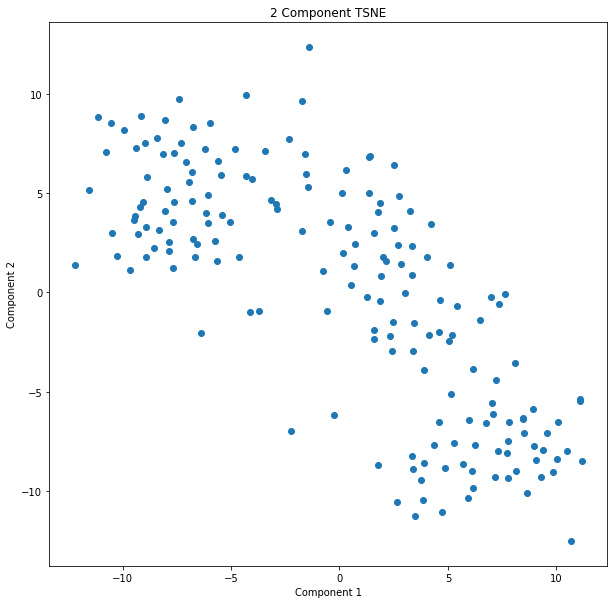

In [43]:
# Extracting the two features from above in order to add them to the dataframe.
tsne_component1 = tsne_dataset1['component1']
tsne_component2 = tsne_dataset1['component2']
# Visualizing the effects of the T-distributed Stochastic Neighbour Embedding.
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component TSNE')
plt.scatter(tsne_component1, tsne_component2)

The above result shows that this technique preserves the small pairwise distance or local similarity and hence the information is preserved for high dimensional datasets. As compared to PCA we can see the presence of clusters clearly.

# **5. Isometric mapping for Dimensionality Reduction**

### It is a non linear dimensionality reduction technique. The steps involved in it are as follow
1. First the nearest neighbours of each point and create a weighted graph by connecting each point to its nearest neighbour. The nodes in the graph are the data points and the weights are the distance between them.
2. Now redefine the distance between the points to be the lenghth of the shortest path between 2 points in the neighbourhood graph.
3. Lastly Apply MDS to the newly created distance matrix.

In [80]:
# Using the same Wine dataset
from sklearn import datasets
from sklearn import manifold
wine = datasets.load_wine()

# input features
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [81]:
# output features
print(wine.target_names)

['class_0' 'class_1' 'class_2']


Assigning Input (X) and Output (Y) variables
Let's assign the all input variables to X and the output variable (class label) to Y

In [82]:

X = wine.data
Y = wine.target

Determining the dimensions

In [83]:
X.shape

(178, 13)

In [84]:
Y.shape

(178,)

In [85]:
# Appying ISOMap on the dataset for 2 components, this will result in 
# a dataset with 2 features.
iso_map = manifold.Isomap(n_neighbors=6, n_components=2)
iso_map.fit(X)
manifold_iso_map_data = iso_map.transform(X)

In [86]:
# Dimensions are reduced from 13 to 2
manifold_iso_map_data.shape

(178, 2)

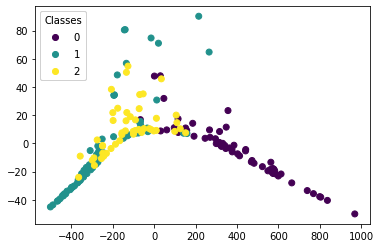

In [87]:
# Plotting the graph against the target variable which is Class of wine in our case
fig, ax = plt.subplots()
scatter = ax.scatter(manifold_iso_map_data[:,0],manifold_iso_map_data[:,1], c=Y,)
# produce a legend with the unique colors from the scatter
isomap = ax.legend(*scatter.legend_elements(),loc="upper left", title="Classes")
ax.add_artist(isomap)


The above plot shows the data points in 2 dimensional space against the class variable which is Wine class in this dataset. The clustering is done on the basis of the target variable.

# **6. Uniform Manifold Approximation and Projection (UMAP) for Dimensionality Reduction**

Uniform Manifold Approximation and Projection (UMAP) is a dimensionality reduction technique that can preserve as much of the local, and more of the global data structure as compared to t-SNE, with a shorter runtime.

In [88]:
# I have used the same Wine dataset for UMAP
# Implementing UMAP.
# installing umap package
!pip install umap-learn


     |████████████████████████████████| 86 kB 2.9 MB/s 
     |████████████████████████████████| 1.1 MB 17.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=59c68908084b931f73761e2593d83ce17e5de31af296a788c50ca82bb9504029
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=7aede8071154cc7682f98d4abef585763a0ec6dcd25cf7990d0dd3bc23431840
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In the below code:
1.   n_neighbors determines the number of neighboring points used.
2.   min_dist controls how tightly embedding is allowed. Larger values ensure embedded points are more evenly distributed.


In [95]:
import umap
# This is converting the data into low dimension, here X is wine.data
embedding = umap.UMAP(n_components=2,n_neighbors=50,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

The above embedding is the 2 dimension representation of the dataset.

In [97]:
component1_umap = embedding[:,0]
component2_umap = embedding[:,1]

<Figure size 432x288 with 0 Axes>

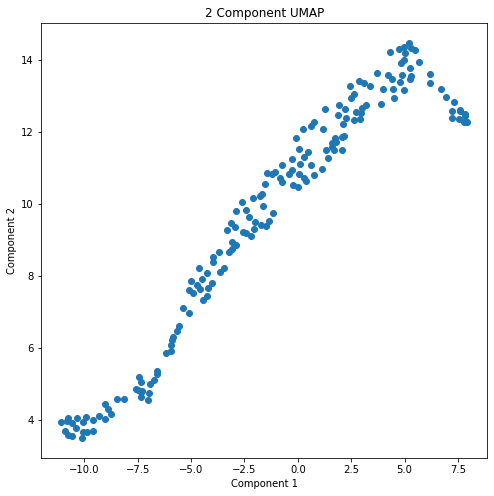

In [98]:
# Visualized the effects of the Uniform Manifold Approximation and Projection.
plt.figure()
plt.figure(figsize=(8,8))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component UMAP')
plt.scatter(component1_umap, component2_umap)

The above graph shows the 2 components which are the result of the dimensionality reduction.



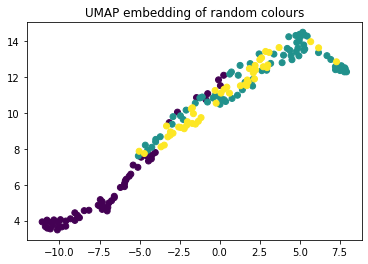

In [99]:
# Plotting the points in 2-d with respect to target variable which is wine Class
plt.scatter(embedding[:,0], embedding[:,1], c=Y)
plt.title('UMAP embedding of random colours');

In the above graph the data is placed in 2 dimensional space, i-e the points that were close in 4-dimensional space are kept close together. There is very less correlation between the transformed variables. By comparing the results of T-SNE and UMAP its clear that the correlation between components is less in UMAP and also often provide a better big picture view of the data as well as preserving local neighbor relations. UMAP is faster then T-SNE and directly be applied to sparse matrix, this eliminates the need to do any preprocessing steps.

The conclusion for the above analysis is that
UMAP outperformed all the techniques as it is very effective for visualization and its speed is better compared to others.
1.   Principal Component Analysis: This is most widely used techniques for dealing with linear data. It divides the data into a set of components which try to explain as much variance as possible.
2. ISOMAP: We use this technique when the data is strongly non-linear
3. t-SNE: This technique also works well when the data is strongly non-linear. It works extremely well for visualizations as well
4. UMAP: This technique works well for high dimensional data. Its run-time is shorter as compared to t-SNE

